In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv('Proyects/student_exam_scores.csv')

In [6]:
df.info()
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   student_id          200 non-null    object 
 1   hours_studied       200 non-null    float64
 2   sleep_hours         200 non-null    float64
 3   attendance_percent  200 non-null    float64
 4   previous_scores     200 non-null    int64  
 5   exam_score          200 non-null    float64
dtypes: float64(4), int64(1), object(1)
memory usage: 9.5+ KB


,student_id,hours_studied,sleep_hours,attendance_percent,previous_scores,exam_score
0,S001,8.0,8.8,72.1,45,30.2
1,S002,1.3,8.6,60.7,55,25.0
2,S003,4.0,8.2,73.7,86,35.8
3,S004,3.5,4.8,95.1,66,34.0
4,S005,9.1,6.4,89.8,71,40.3
...,...,...,...,...,...,...
195,S196,10.5,5.4,94.0,87,42.7
196,S197,7.1,6.1,85.1,92,40.4
197,S198,1.6,6.9,63.8,76,28.2
198,S199,12.0,7.3,50.5,58,42.0


In [7]:
print(df.isna().sum())
print(df.duplicated().sum())
print(df.describe())

student_id            0
hours_studied         0
sleep_hours           0
attendance_percent    0
previous_scores       0
exam_score            0
dtype: int64
0
       hours_studied  sleep_hours  attendance_percent  previous_scores  \
count     200.000000   200.000000          200.000000       200.000000   
mean        6.325500     6.622000           74.830000        66.800000   
std         3.227317     1.497138           14.249905        15.663869   
min         1.000000     4.000000           50.300000        40.000000   
25%         3.500000     5.300000           62.200000        54.000000   
50%         6.150000     6.700000           75.250000        67.500000   
75%         9.000000     8.025000           87.425000        80.000000   
max        12.000000     9.000000          100.000000        95.000000   

       exam_score  
count  200.000000  
mean    33.955000  
std      6.789548  
min     17.100000  
25%     29.500000  
50%     34.050000  
75%     38.750000  
max     51.300

Desde este punto ya vamos encontrando informacion util acerca del estudiante promedio:

    -Duerme 6.6 horas antes del examen.

    -Estudia 6.2 horas.

    -Accede al 74.8% de las clases.

    -Promedia 66 en su examen anterior.

    -Promedia 33.9 en su examen actual.

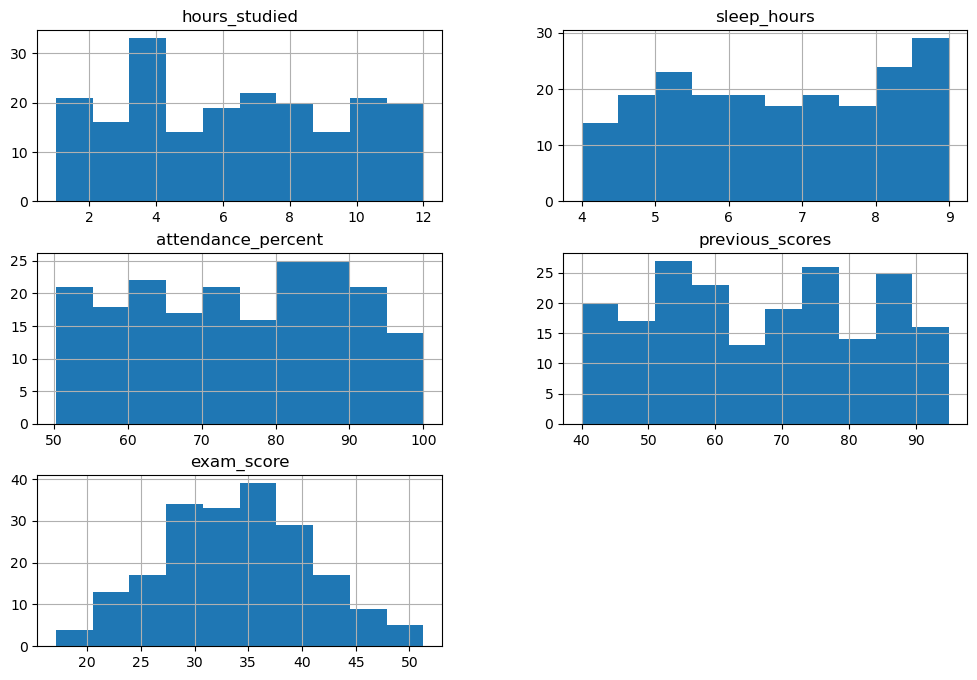

In [9]:
#Observamos los hisotgramas para cada columna numerica
df[['hours_studied', 'sleep_hours', 'attendance_percent', 'previous_scores', 'exam_score']].hist(figsize= (12,8))
plt.show()

In [10]:
df['student_id'].nunique()

200

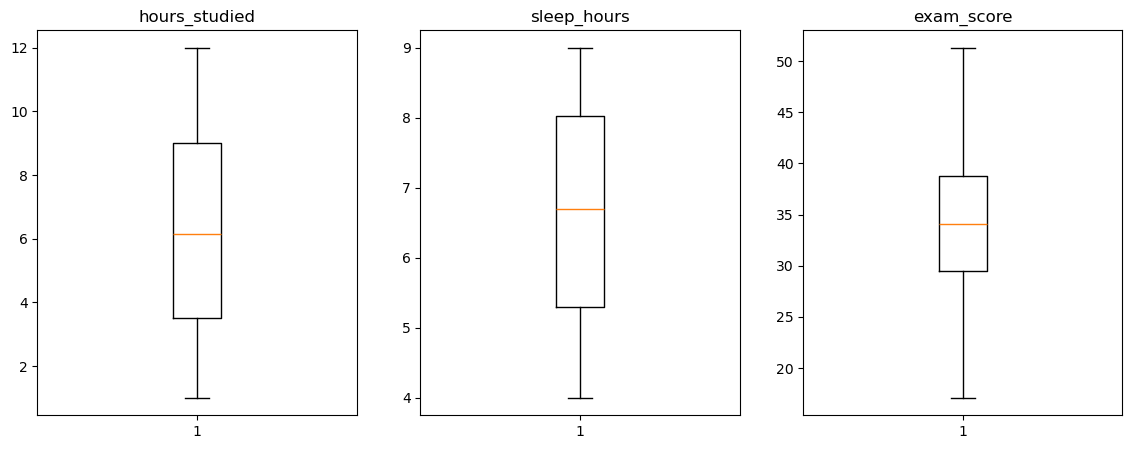

In [11]:
fig, axes = plt.subplots(1, 3, figsize=(14,5))

axes[0].boxplot(df['hours_studied'])
axes[0].set_title('hours_studied')

axes[1].boxplot(df['sleep_hours'])
axes[1].set_title('sleep_hours')

axes[2].boxplot(df['exam_score'])
axes[2].set_title('exam_score')

plt.show()

In [12]:
df.corr(numeric_only=True)

,hours_studied,sleep_hours,attendance_percent,previous_scores,exam_score
hours_studied,1.000000,0.077864,-0.031311,0.069078,0.776751
sleep_hours,0.077864,1.000000,0.000572,-0.194251,0.188222
attendance_percent,-0.031311,0.000572,1.000000,0.051958,0.225713
previous_scores,0.069078,-0.194251,0.051958,1.000000,0.431105
exam_score,0.776751,0.188222,0.225713,0.431105,1.000000


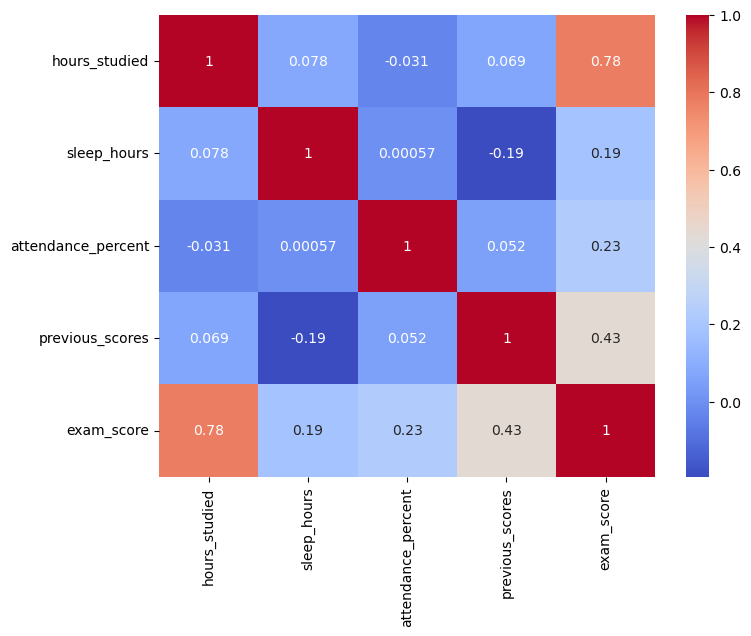

In [13]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.show()

Se observan multiples correlaciones, pero principalmente influyen las horas de estudio y el resultado de la ultima prueba.

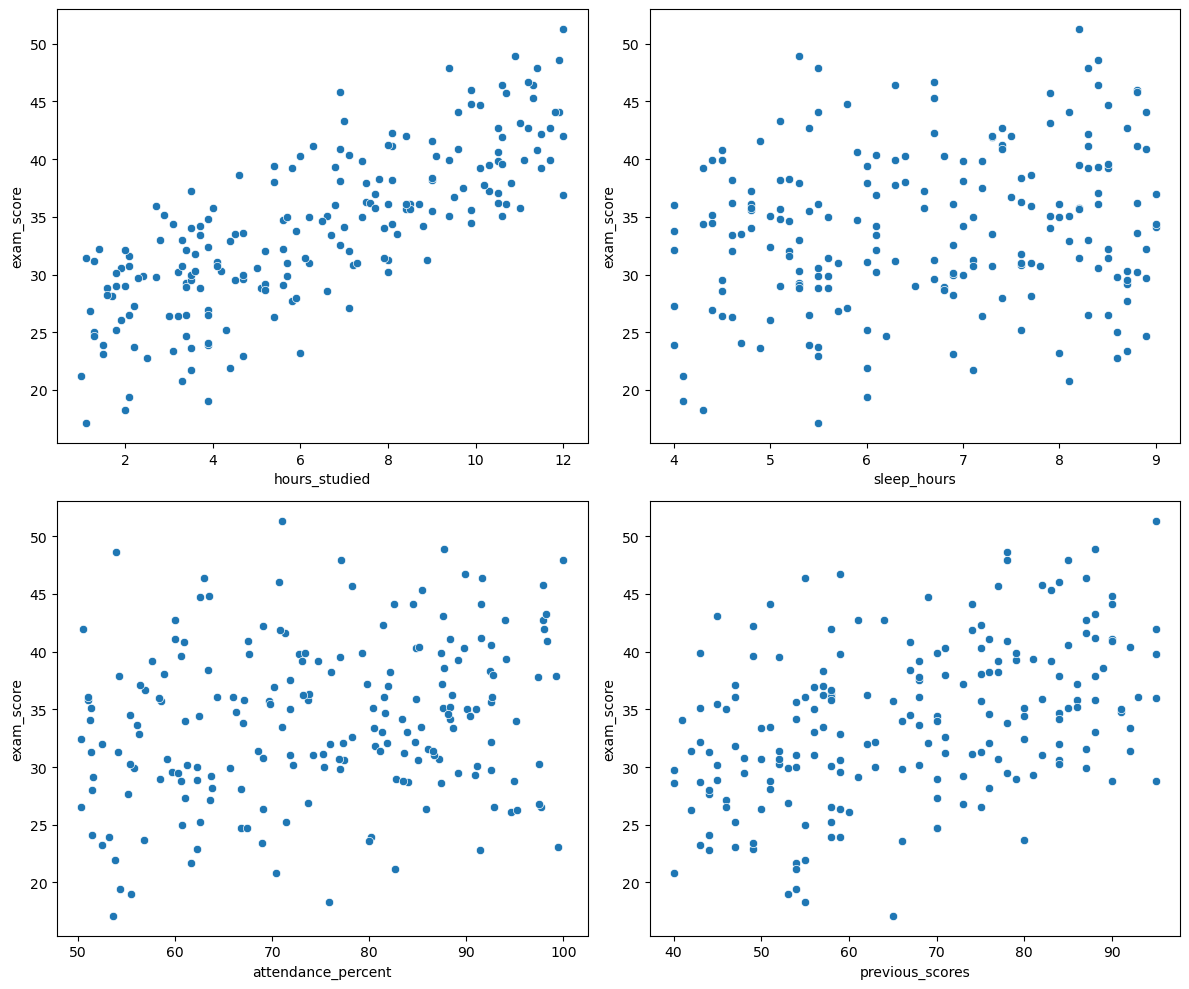

In [17]:
fig, axes = plt.subplots(2, 2, figsize=(12,10))

sns.scatterplot(data=df, x='hours_studied', y='exam_score', ax=axes[0,0])
sns.scatterplot(data=df, x='sleep_hours', y='exam_score', ax=axes[0,1])
sns.scatterplot(data=df, x='attendance_percent', y='exam_score', ax=axes[1,0])
sns.scatterplot(data=df, x='previous_scores', y='exam_score', ax=axes[1,1])

plt.tight_layout()
plt.show()

Tiempo de estudio: Se observa claramente la correlacion, a mas horas de estudio el resultado sera mejor.

Cantidad de sueño: Se aprecia una relacion ligera, el tiempo de sueño no parece influenciar en gran cantidad.

Asistencia: Al igual que el sueño, se aprecia una ligera relacion unicamente, existen varios estudiantes con calificaciones atipicas en comparacion a la cantidad de de clases asistidas, valdria la pena revisarlo mas a fondo.

Calificaciones previas: Se aprecia una relacion fuerte. Parece ser que estudiantes que anteriormente sacaron buenas calificaciones lo han vuelto a hacer.

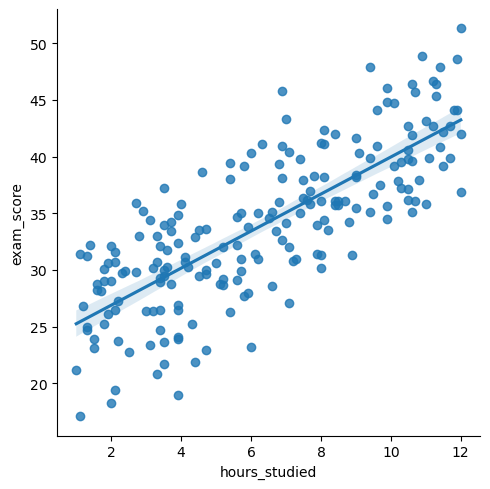

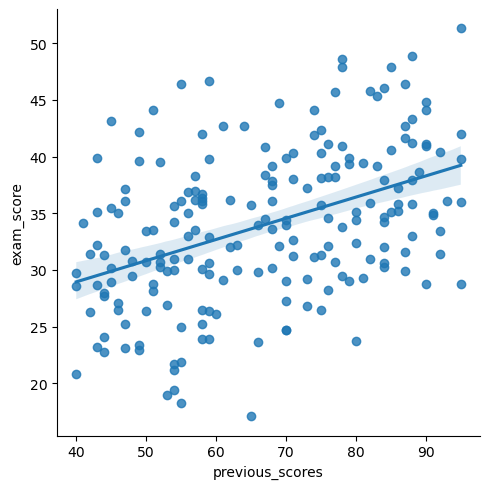

In [21]:
sns.lmplot(data=df, x='hours_studied', y='exam_score')
sns.lmplot(data=df, x='previous_scores', y='exam_score')

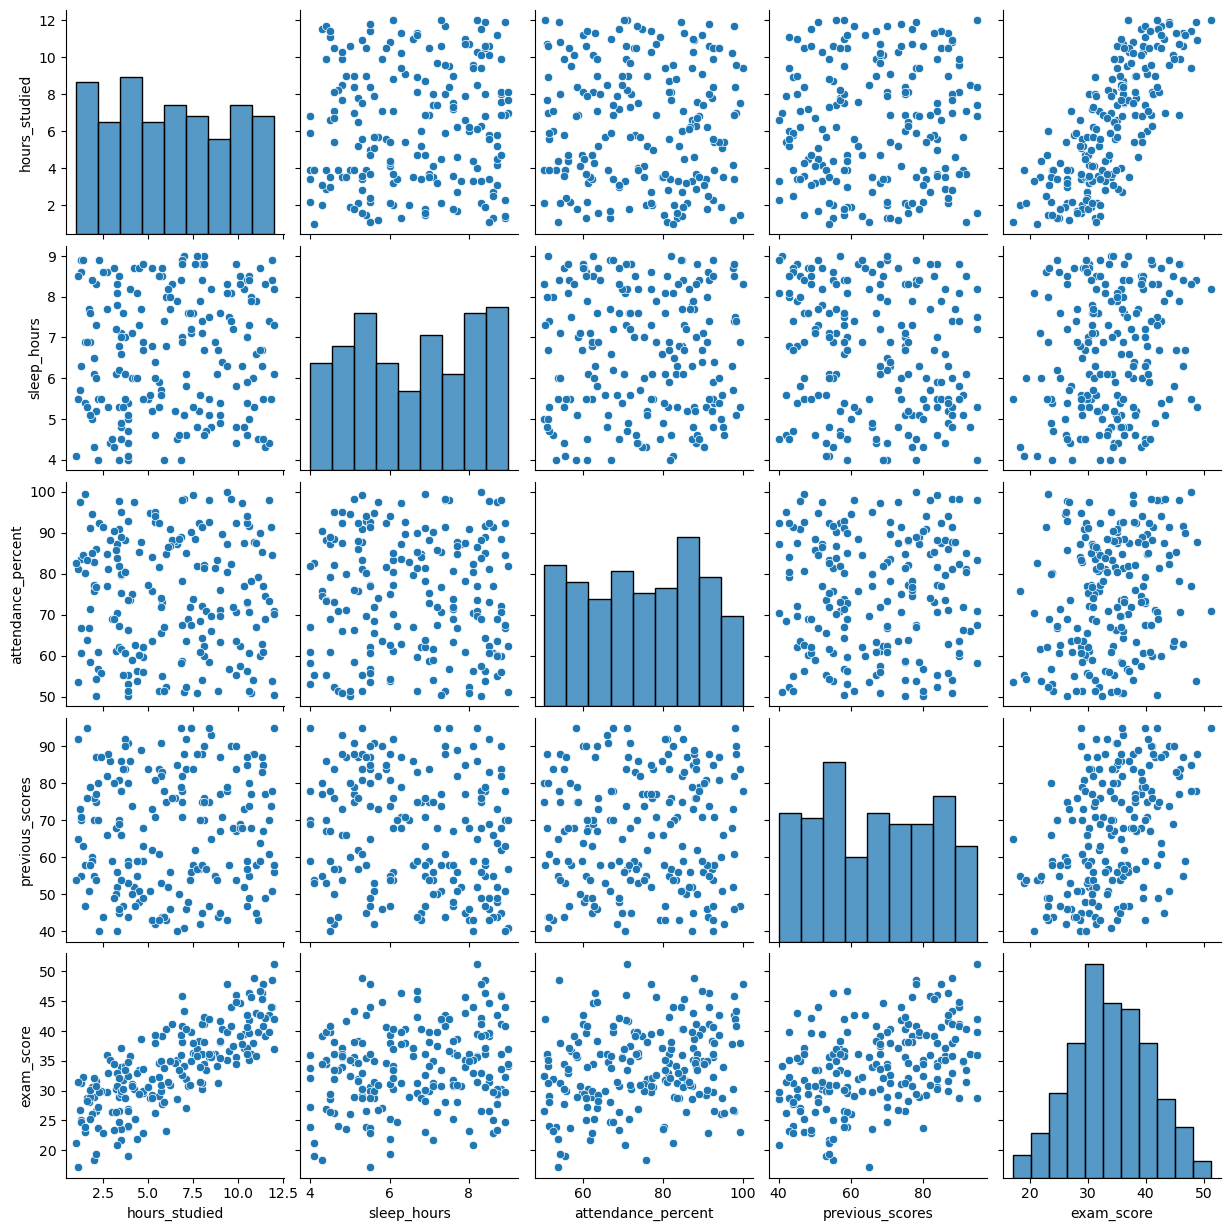

In [24]:
sns.pairplot(df[['hours_studied', 'sleep_hours', 'attendance_percent', 'previous_scores', 'exam_score']])
plt.show()

Regresion Lienal

In [29]:
from sklearn.model_selection import train_test_split

X = df[['hours_studied', 'sleep_hours', 'attendance_percent', 'previous_scores']]
y = df['exam_score']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.2, random_state = 42
)

In [30]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [32]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

mae, mse, rmse, r2

(2.310858235895833, 7.761782668623075, 2.785997607433121, 0.8537447137159516)

In [37]:
coeficientes = pd.DataFrame({
    'Variale': X.columns,
    'Coeficiente': model.coef_
})

coeficientes

,Variale,Coeficiente
0,hours_studied,1.549341
1,sleep_hours,0.884156
2,attendance_percent,0.108949
3,previous_scores,0.183034


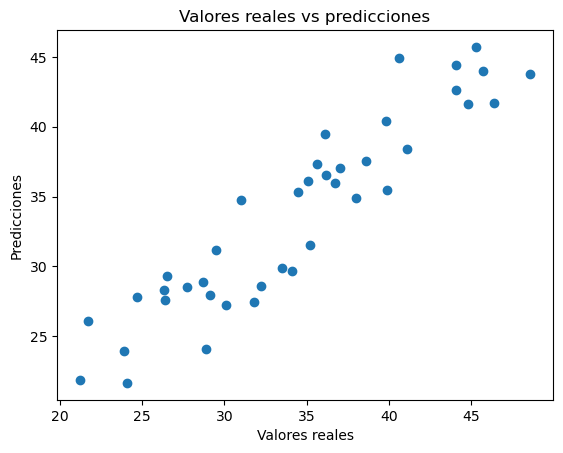

In [39]:
plt.scatter(y_test, y_pred)
plt.xlabel('Valores reales')
plt.ylabel('Predicciones')
plt.title('Valores reales vs predicciones')
plt.show()

In [47]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

vif_data

,Variable,VIF
0,hours_studied,4.811625
1,sleep_hours,13.953221
2,attendance_percent,19.058840
3,previous_scores,13.948225


In [53]:
X

,hours_studied,sleep_hours,attendance_percent,previous_scores
0,8.0,8.8,72.1,45
1,1.3,8.6,60.7,55
2,4.0,8.2,73.7,86
3,3.5,4.8,95.1,66
4,9.1,6.4,89.8,71
...,...,...,...,...
195,10.5,5.4,94.0,87
196,7.1,6.1,85.1,92
197,1.6,6.9,63.8,76
198,12.0,7.3,50.5,58


In [61]:
#Crearemos el siguiente df que nos servira en PowerBI
df['predicted_exam_score'] = model.predict(X)
df[['exam_score', 'predicted_exam_score']].head()

,exam_score,predicted_exam_score
0,30.2,34.062109
1,25.0,24.093003
2,35.8,35.012944
3,34.0,29.902989
4,40.3,40.331686


In [63]:
df.to_csv('students_with_predictions.csv', index=False)